In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

In [5]:
DATA_PATH = "./data/titanic/"

df = pd.read_csv(DATA_PATH+"train.csv")
SEED = 42

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [7]:
df.columns = [x.lower() for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.tail()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 타겟 데이터 확인

In [9]:
new_survived = pd.Categorical(df["survived"])
new_survived[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [10]:
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Survived', 'Survived', 'Survived', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


### 데이터 분리

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('survived', axis=1)
y = df['survived']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=SEED, test_size=0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((712, 11), (179, 11), (712,), (179,))

In [13]:
new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


### Data Cleaning
> 모델이 학습을 할 수 있도록 데이터를 깨끗하게 다듬는 작업

1. 완결성
> 결측값을 가능하면 제거해야 함
2. 유일성
> 중복된 데이터를 가능하면 하나만 남겨야 함
3. 통일성
> 동일한 데이터 형식으로 맞춰야 함

#### 중복 데이터 처리

In [14]:
# 중복제거
# 지금 이 데이터는 중복제거 전과 후가 같으므로 중복된 데이터가 없음을 확인할 수 있음
print(f"before: {df.shape}")
df.drop_duplicates(keep='first', inplace=True, ignore_index=True, )
print(f"after: {df.shape}")

before: (891, 12)
after: (891, 12)


In [15]:
# passengerid에 중복값이 있는지 확인
df['passengerid'].nunique(), df.shape[0]

(891, 891)

모델이 학습을 하기 위해선 Row 전체가 중복된 데이터도 좋지 않지만, 모든 값이 unique한 column도 학습할 수 없기 때문에 없애는 것이 좋다.

In [16]:
# passengerid는 모든 값이 unique하기 때문에 삭제
df.drop('passengerid', axis=1, inplace=True)
print(f"{df.columns}")
df.head()

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 결측치(Missing Value)

> 인지할 수 없는 데이터들

- NaN
- null
- undefined

결측치를 모두 제거할 경우, 막대한 데이터 손실을 일으킬 수 있음   
결측치를 남길 경우, 모델의 학습에 악영향을 미칠 수 있음

##### 결측치 유형 파악

- 완전 무작위 결측
> 
- 무작위 결측
> 
- 비무작위 결측
> 
<br>

ex) 성별(X)에 따라 체중(y)을 예측하기 위해 설문조사로 데이터를 모았다고 하자.   
- 완전 무작위 결측
> 그냥 체중을 응답하지 않은 경우, y가 누락된 이유는 다른 X, y값과는 관련이 없음.
- 무작위 결측
> 여성(X)의 경우 체중에 잘 응답하지 않았던 경우   
> y가 누락된 이유는 성별(X)의 영향임.
- 비무작위 결측
> 체중이 무거운 사람은 자신의 체중을 잘 응답하지 않음.   
> y가 누락된 이유는 y의 값 그 자체의 영향임.

In [17]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   name         712 non-null    object 
 3   sex          712 non-null    object 
 4   age          572 non-null    float64
 5   sibsp        712 non-null    int64  
 6   parch        712 non-null    int64  
 7   ticket       712 non-null    object 
 8   fare         712 non-null    float64
 9   cabin        159 non-null    object 
 10  embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 61.3+ KB


In [18]:
X_tr.isnull().sum().sum(), X_tr.shape[0]

(695, 712)

In [19]:
# 각 컬럼별 결측치의 수
X_tr.isnull().sum().sort_values(ascending=False)

cabin          553
age            140
embarked         2
passengerid      0
pclass           0
name             0
sex              0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

In [20]:
# 각 컬럼별 결측치 비율
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False)

cabin          0.7767
age            0.1966
embarked       0.0028
passengerid    0.0000
pclass         0.0000
name           0.0000
sex            0.0000
sibsp          0.0000
parch          0.0000
ticket         0.0000
fare           0.0000
dtype: float64

<AxesSubplot: >

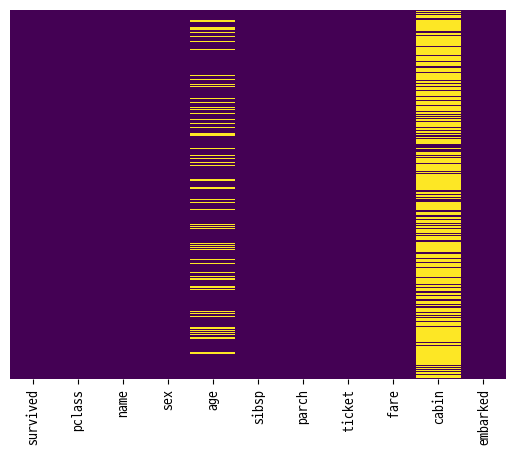

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Total Missing Value (%)')

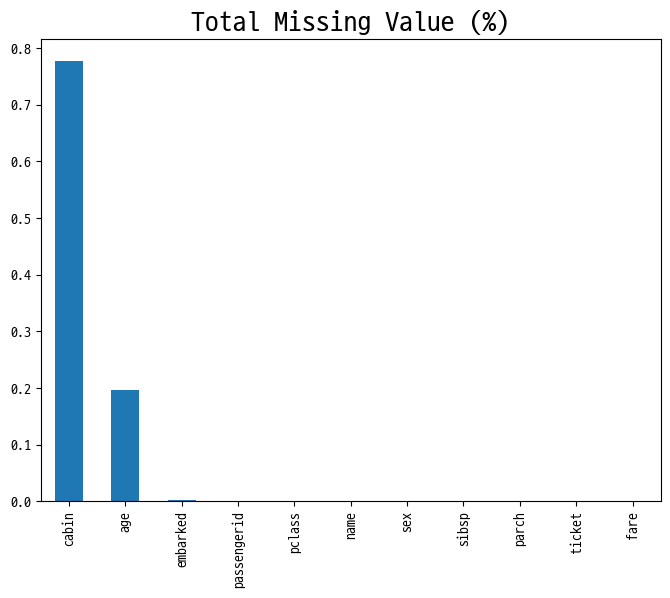

In [22]:
total = X_tr.isnull().sum().sort_values(ascending=False)
percent = (X_tr.isnull().sum() / X_tr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize=(8, 6), fontsize=10)

plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.title("Total Missing Value (%)", fontsize=20)

In [23]:
X_tr['hasCabin'] = X_tr['cabin'].isnull().apply(lambda x: 0 if x == True else 1)
X_tr['hasAge'] = X_tr['age'].isnull().apply(lambda x: 0 if x == True else 1)

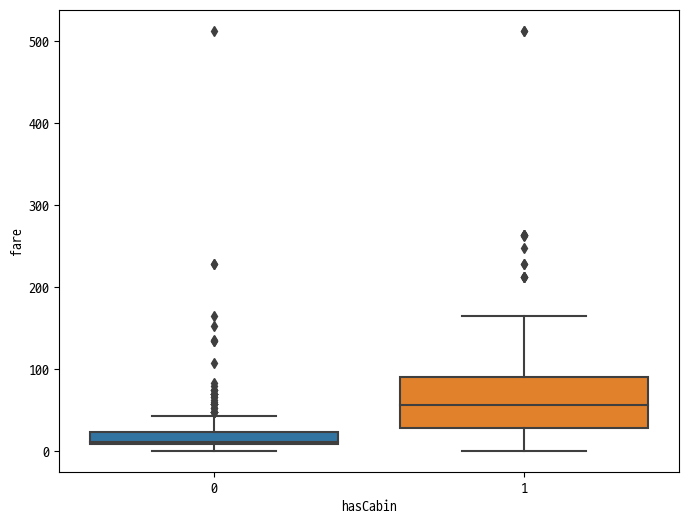

In [24]:
data = pd.concat([X_tr['fare'], X_tr['hasCabin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hasCabin', y='fare', data=data)

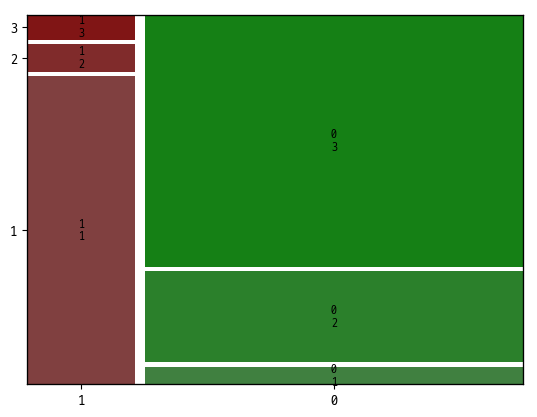

In [25]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(X_tr, ['hasCabin', 'pclass'], gap=0.02)
plt.show()

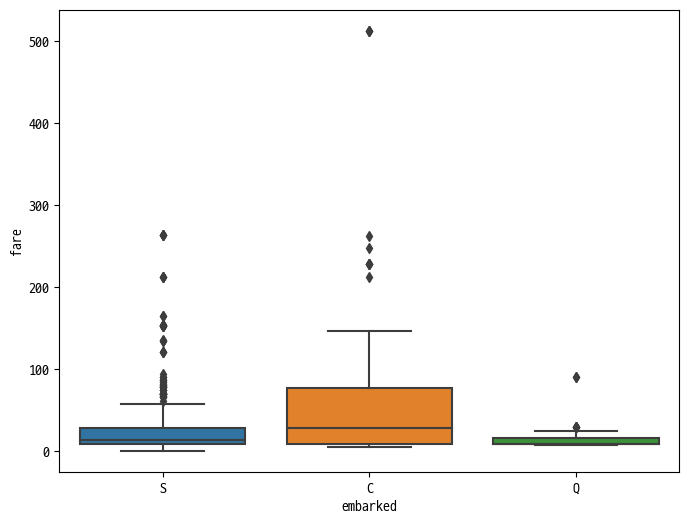

In [26]:
data = pd.concat([X_tr['fare'], X_tr['embarked']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='embarked', y="fare", data=data)

<AxesSubplot: xlabel='embarked', ylabel='fare'>

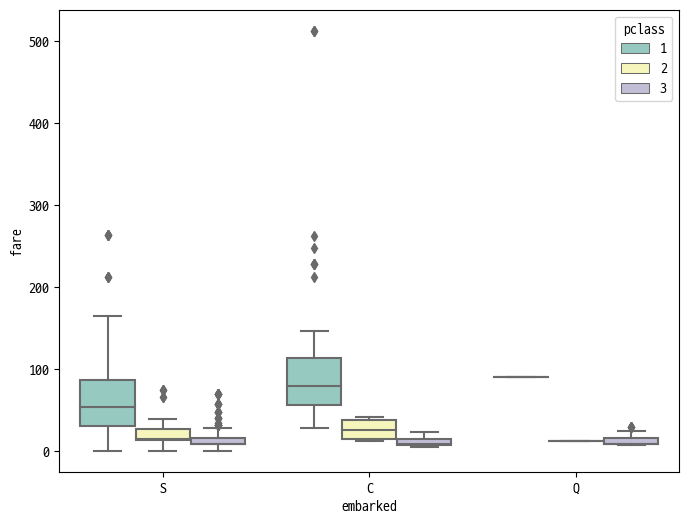

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="embarked", y="fare", hue="pclass",
            data=X_tr, palette="Set3")

##### 결측치 제거

In [28]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
# 결측치가 있는 행 제거 : X_tr.dropna(axis=0)
df_droprows = X_tr.dropna(axis=0)
print(f'after: {df_droprows.shape} / isnull().sum(): {df_droprows.isnull().sum().sum()}')

before: (712, 13) / isnull().sum(): 695
after: (143, 13) / isnull().sum(): 0


In [29]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
# 결측치가 있는 열 제거 : X_tr.dropna(axis=1)
df_dropcols = X_tr.dropna(axis=1)
print(f'after: {df_dropcols.shape} / isnull().sum(): {df_dropcols.isnull().sum().sum()}')

before: (712, 13) / isnull().sum(): 695
after: (712, 10) / isnull().sum(): 0


##### 수치형 치환

In [30]:
X_tr['age_mean'] = X_tr['age'].fillna(X_tr['age'].mean())
X_tr['age_median'] = X_tr['age'].fillna(X_tr['age'].median())

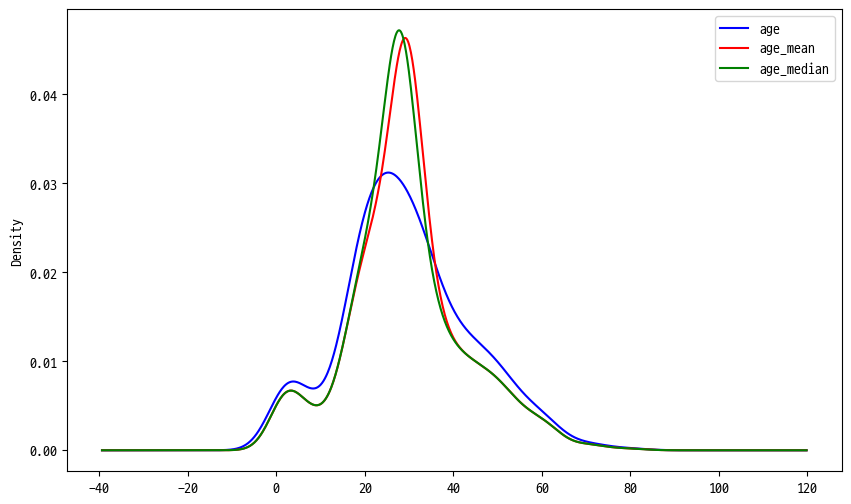

In [31]:
# 분포 시각화
fig, ax = plt.subplots(figsize=(10, 6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_mean'].plot(kind='kde', ax=ax, color='red')
X_tr['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

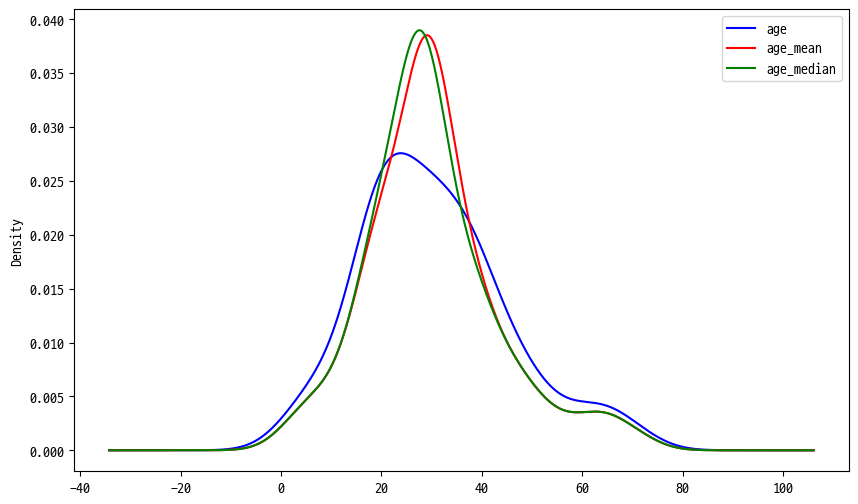

In [33]:
X_te['age_mean'] = X_te['age'].fillna(X_tr['age'].mean())
X_te['age_median'] = X_te['age'].fillna(X_tr['age'].median())

# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_te['age'].plot(kind='kde', ax=ax, color='blue')
X_te['age_mean'].plot(kind='kde', ax=ax, color='red')
X_te['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [32]:
X_tr['age_random'] = X_tr['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_tr['age'].isnull().sum()))
# random_sampling에 X_tr['age'] 값이 null인 부분의 인덱스를 부여
random_sampling.index = X_tr[lambda x: x['age'].isnull()].index 

X_tr.loc[X_tr['age'].isnull(), 'age_random'] = random_sampling

# null값이 채워졌는지 확인
X_tr[['age', 'age_random']].isnull().sum()

age           140
age_random      0
dtype: int64

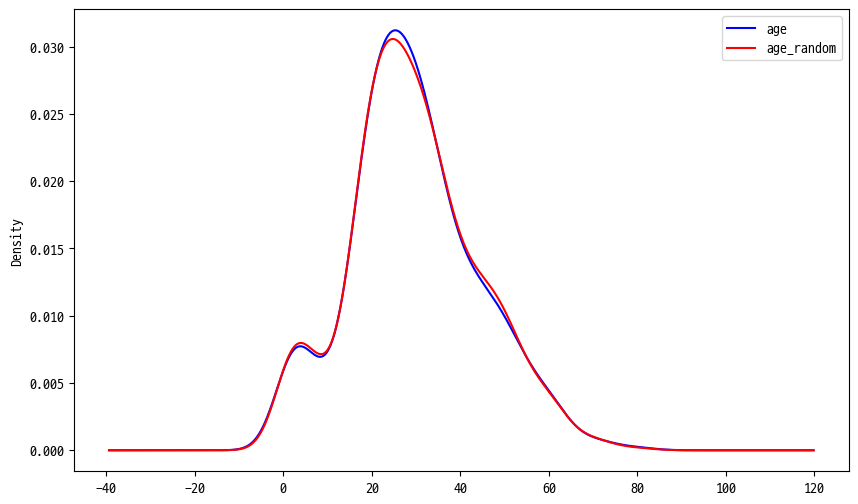

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_random'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

age           37
age_random     0
dtype: int64


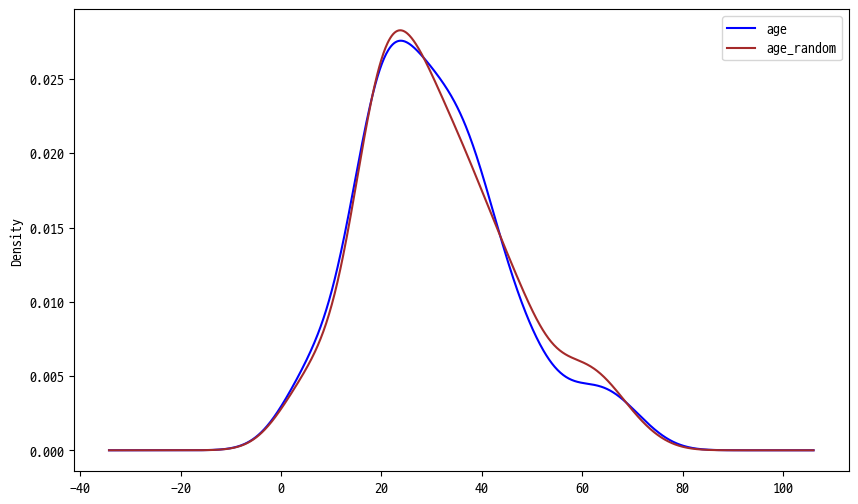

In [43]:
X_te['age_random'] = X_te['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_te['age'].isnull().sum()))
random_sampling.index = X_te[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
X_te.loc[X_te['age'].isnull(), 'age_random'] = random_sampling

# 확인
print(X_te[['age', 'age_random']].isnull().sum())

# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_te['age'].plot(kind='kde', ax=ax, color='blue')
X_te['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

random sample로 치환한 값이 mean/median으로 치환한 값보다 원래의 분산 및 분포를 잘 보존하는 것을 볼 수 있다.

##### 범주형 치환

In [44]:
# 범주 별 빈도 수 확인
X_tr['embarked'].value_counts(dropna=False)

S      525
C      125
Q       60
NaN      2
Name: embarked, dtype: int64

In [47]:
# 최빈값으로 NaN을 채워보기
embarked_mode = X_tr['embarked'].mode().values[0]

X_tr['embarked_filled'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked_filled'] = X_te['embarked'].fillna(embarked_mode)

print(X_tr[['embarked', 'embarked_filled']].isnull().sum())
print('-'*50)
print(X_te[['embarked', 'embarked_filled']].isnull().sum())

embarked           2
embarked_filled    0
dtype: int64
--------------------------------------------------
embarked           0
embarked_filled    0
dtype: int64


##### sklearn 사용

SimplImputer; 치환

파라미터
- missing_values: 기본적으로 비어있는 값을 np.nan으로 채우게 됨.   
필요시 다른 값을 빈값으로 인식하게 할 수 있음
- strategy: 채울 값에 대한 함수; mean, median, most_frequent, constant 등
- fill_value: strategy의 값이 constant일 때, 여기에 정의된 값으로 채움

In [48]:
from sklearn.impute import SimpleImputer

# strategy = mean, median, most_frequent
imputer = SimpleImputer(strategy="mean")

X_tr['age_simple_mean'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_simple_mean'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_simple_mean']].isnull().sum()

age                140
age_simple_mean      0
dtype: int64

KNNImputer; 모델 기반

In [49]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

X_tr['age_knn'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_knn'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_knn']].isnull().sum()

age        140
age_knn      0
dtype: int64

IterativeImputer; 모델 기반

In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_iter_none'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

In [59]:
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(verbose=0, random_state=SEED), 
max_iter=10, verbose=0, imputation_order='ascending', random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_iter_none'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

In [58]:
X_tr[lambda x: x['age'].isnull()].index

Int64Index([  8,   9,  26,  29,  34,  35,  40,  41,  44,  53,
            ...
            670, 675, 680, 686, 697, 699, 700, 701, 702, 708],
           dtype='int64', length=140)

In [53]:
X_tr[['age', 'age_simple_mean', 'age_knn', 'age_iter_none']]

,age,age_simple_mean,age_knn,age_iter_none
0,45.5,45.500000,45.500000,45.500000
1,23.0,23.000000,23.000000,23.000000
2,32.0,32.000000,32.000000,32.000000
3,26.0,26.000000,26.000000,26.000000
4,6.0,6.000000,6.000000,6.000000
...,...,...,...,...
707,21.0,21.000000,21.000000,21.000000
708,NaN,29.498846,29.498846,29.498846
709,41.0,41.000000,41.000000,41.000000
710,14.0,14.000000,14.000000,14.000000


#### 비대칭 데이터
- 왜도, 첨도

비대칭 데이터 확인

In [82]:
# 왜도
X_tr['fare'].skew()

4.875065571137606

In [83]:
# 첨도
X_tr['fare'].kurt()

33.67953505365366

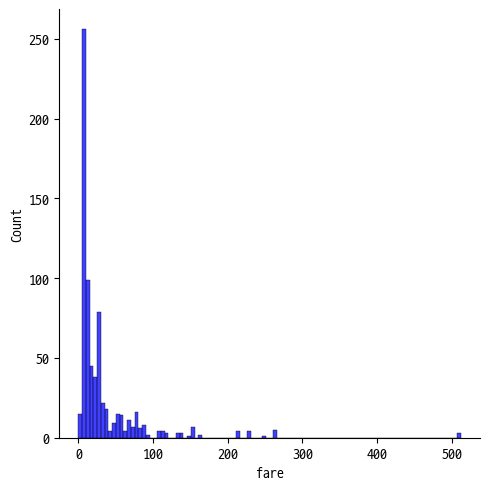

In [84]:
sns.displot(X_tr["fare"], color="b", label="Skewness : %.2f"%(X_tr["fare"].skew()))

비대칭 데이터 처리

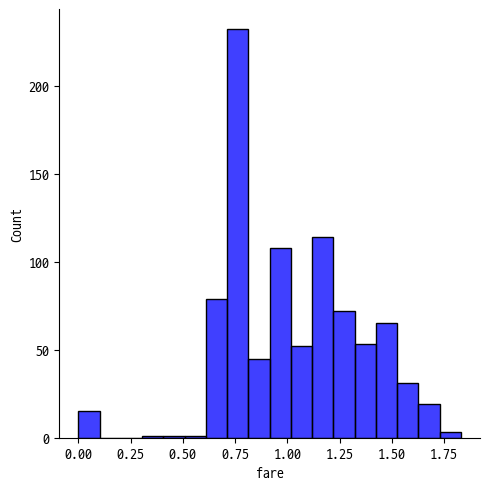

In [86]:
# log를 이용하여 비대칭 처리
X_tr["fare"] = X_tr["fare"].map(lambda i: np.log(i) if i > 0 else 0)
sns.displot(X_tr["fare"], color="b", label="Skewness : %.2f"%(X_tr["fare"].skew()))

In [87]:
X_tr['fare'].skew(), X_tr['fare'].kurt()

(0.4551381891080033, 0.7282528409527824)

#### 이상치

이상치 확인

In [88]:
X_tr['age'].skew(), X_tr['age'].kurt()

(0.3310017370749743, 0.1492333819804159)

<AxesSubplot: ylabel='age'>

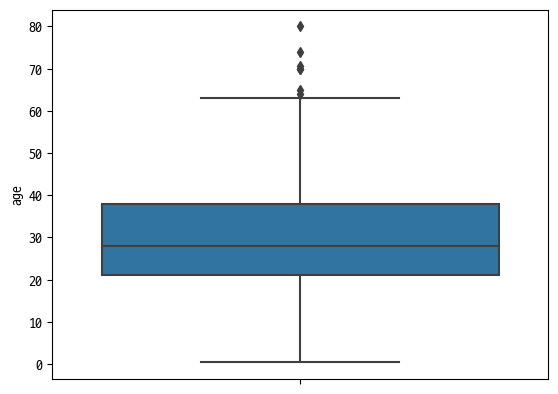

In [89]:
sns.boxplot(y=X_tr['age'], data=X_tr)

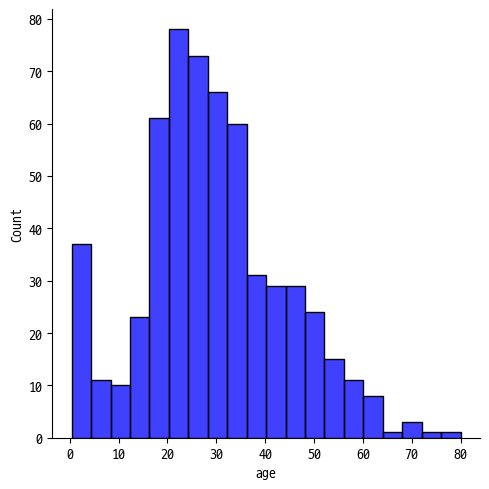

In [90]:
sns.displot(X_tr["age"], color="b", label="Skewness : %.2f"%(X_tr["age"].skew()))

<AxesSubplot: xlabel='survived', ylabel='age'>

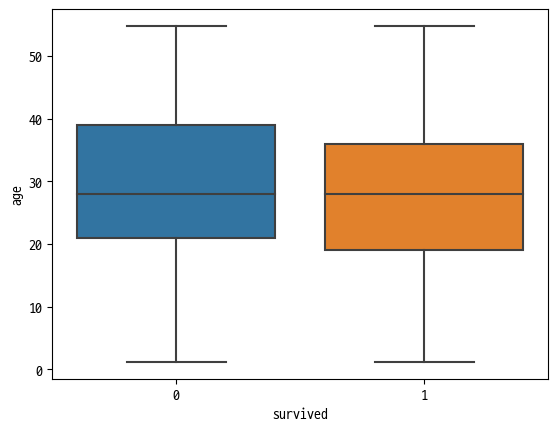

In [92]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)

In [95]:
X_tr

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,hasCabin,hasAge,age_mean,age_median,age_random,embarked_filled,age_simple_mean,age_knn,age_iter_none
0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,3.349904,C124,S,1,1,45.500000,45.5,45.5,S,45.500000,45.500000,45.500000
1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,2.564949,NaN,S,0,1,23.000000,23.0,23.0,S,23.000000,23.000000,23.000000
2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,2.070022,NaN,S,0,1,32.000000,32.0,32.0,S,32.000000,32.000000,32.000000
3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,2.061048,NaN,S,0,1,26.000000,26.0,26.0,S,26.000000,26.000000,26.000000
4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,3.442819,NaN,S,0,1,6.000000,6.0,6.0,S,6.000000,6.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,2.034706,NaN,S,0,1,21.000000,21.0,21.0,S,21.000000,21.000000,21.000000
708,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,3.433987,NaN,S,0,0,29.498846,28.0,30.0,S,29.498846,29.498846,29.498846
709,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,2.646763,NaN,S,0,1,41.000000,41.0,41.0,S,41.000000,41.000000,41.000000
710,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,4.787492,B96 B98,S,1,1,14.000000,14.0,14.0,S,14.000000,14.000000,14.000000


In [69]:
df.groupby(['survived'])['age'].quantile([0.25, 0.75])

survived      
0         0.25    21.0
          0.75    39.0
1         0.25    19.0
          0.75    36.0
Name: age, dtype: float64

In [70]:
df['age'].quantile([0.25, 0.5, 0.75])

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64

In [72]:
IQR = df['age'].quantile([0.25, 0.75]).values[1] - df['age'].quantile([0.25, 0.75]).values[0]
Upper_boundary = df['age'].median() + 1.5*IQR
Lower_boundary = df['age'].median() - 1.5*IQR
print('age의 이상치는 < {lowerboundary} or > {upperboundary}입니다.'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

age의 이상치는 < 1.1875 or > 54.8125입니다.


In [76]:
cond1 = df['age'] > Upper_boundary
cond2 = df['age'] < Lower_boundary
# x > Upper 이상치와 x < Lower 이상치인 데이터를 이상치라고 놓는다
cond = cond1 | cond2
outlier = df.loc[cond]
# 891개 중 56개가 이상치로 판별
print(outlier.shape, df.shape)
outlier.head()

(56, 11) (891, 11)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
11,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,3.279030,C103,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,2.772589,NaN,S
33,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,2.351375,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,4.126799,B30,C
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,3.367296,NaN,S


In [75]:
df['age'].quantile([0.25, 0.75])

0.25    20.125
0.75    38.000
Name: age, dtype: float64

이상치 처리

In [77]:
df['age'] = df['age'].map(lambda x: Upper_boundary if x > Upper_boundary else x)
df['age'] = df['age'].map(lambda x: Lower_boundary if x < Lower_boundary else x)

In [78]:
cond1 = df['age'] > Upper_boundary
cond2 = df['age'] < Lower_boundary
cond = cond1 | cond2

outlier = df.loc[cond]
print(outlier.shape, df.shape)
outlier.head()

# 이미 이상치가 처리된 데이터이기 때문에 이상치가 잡히지 않는다.

(0, 11) (891, 11)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


<AxesSubplot: ylabel='age'>

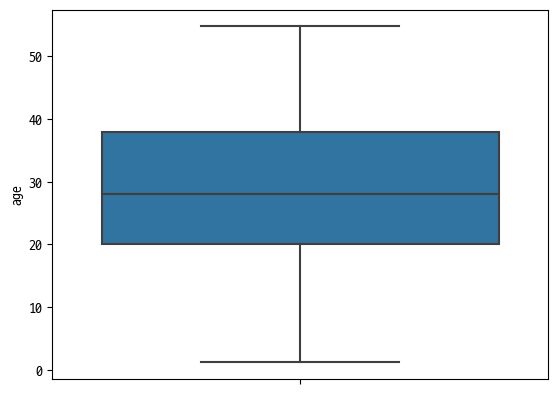

In [79]:
sns.boxplot(y=df['age'], data=df)

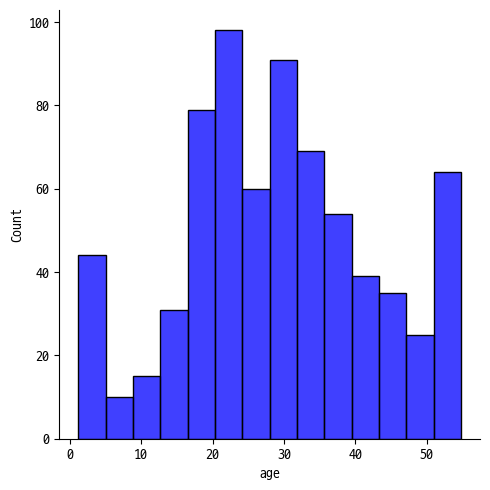

In [80]:
sns.displot(df["age"], color="b", label="Skewness: %.2f"%(df["age"].skew()))

<AxesSubplot: xlabel='survived', ylabel='age'>

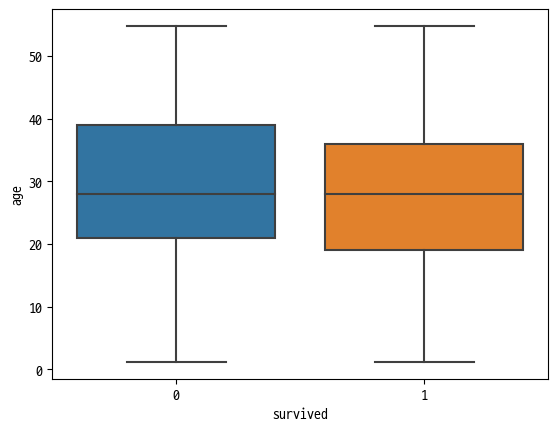

In [81]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)